In [1]:
'''
Author: Aishik Chakraborty
Dropout in Tensorflow
'''

import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

tf.set_random_seed(123)  # reproducibility

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.eye(10)[np.asarray(mnist.train.labels, dtype=np.int32)]
test_data = mnist.test.images  # Returns np.array
test_labels = np.eye(10)[np.asarray(mnist.test.labels, dtype=np.int32)]

print train_labels.shape
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 25
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

h1 = tf.layers.dense(inputs=X, units=512, activation=tf.nn.relu)
h1 = tf.nn.dropout(h1, keep_prob)
h2 = tf.layers.dense(inputs=h1, units=512, activation=tf.nn.relu)
h2 = tf.nn.dropout(h2, keep_prob)
h3 = tf.layers.dense(inputs=h2, units=512, activation=tf.nn.relu)
h3 = tf.nn.dropout(h3, keep_prob)

logits = tf.layers.dense(inputs=h3, units=10)
pred = tf.nn.softmax(logits)

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print 'Learning without dropout...'
loss_wo_dropout = []
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = train_data[(i)*batch_size:(i+1)*batch_size], train_labels[(i)*batch_size:(i+1)*batch_size]
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 1.}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    loss_wo_dropout.append(avg_cost)

    print 'Epoch : ' + str(epoch) + ' Loss: ' + str(avg_cost)

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: test_data, Y: test_labels, keep_prob: 1}))
sess.close()


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
(55000, 10)
Learning without dropout...
Epoch : 0 Loss: 0.234592813143
Epoch : 1 Loss: 0.0952002500922
Epoch : 2 Loss: 0.0577483875871
Epoch : 3 Loss: 0.0427253466191
Epoch : 4 Loss: 0.0372577591285


KeyboardInterrupt: 

Learning with dropout...
Epoch : 0 Loss: 0.308913461116
Epoch : 1 Loss: 0.145268070755
Epoch : 2 Loss: 0.110090108775
Epoch : 3 Loss: 0.089254778083
Epoch : 4 Loss: 0.0750771207644
Epoch : 5 Loss: 0.0662859850726
Epoch : 6 Loss: 0.0606164864436
Epoch : 7 Loss: 0.0584314196691
Epoch : 8 Loss: 0.0508241639844
Epoch : 9 Loss: 0.0504146434334
Epoch : 10 Loss: 0.0451313531801
Epoch : 11 Loss: 0.0443279111163
Epoch : 12 Loss: 0.0396739430867
Epoch : 13 Loss: 0.0377859753548
Epoch : 14 Loss: 0.038358849923
Epoch : 15 Loss: 0.0335588926489
Epoch : 16 Loss: 0.0330988445323
Epoch : 17 Loss: 0.0327045656395
Epoch : 18 Loss: 0.0331149782583
Epoch : 19 Loss: 0.0309197271542
Epoch : 20 Loss: 0.0319674465828
Epoch : 21 Loss: 0.0277673794492
Epoch : 22 Loss: 0.0291064827682
Epoch : 23 Loss: 0.0309327058487
Epoch : 24 Loss: 0.022335599923
Learning Finished!
('Accuracy:', 0.98510015)


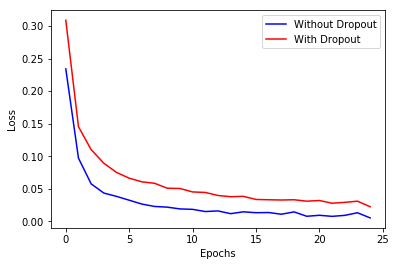

In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print 'Learning with dropout...'

# train my model
loss_w_dropout = []
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = train_data[(i)*batch_size:(i+1)*batch_size], train_labels[(i)*batch_size:(i+1)*batch_size]
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    loss_w_dropout.append(avg_cost)

    print 'Epoch : ' + str(epoch) + ' Loss: ' + str(avg_cost)

print('Learning Finished!')

print('Accuracy:', sess.run(accuracy, feed_dict={
      X: test_data, Y: test_labels, keep_prob: 1}))

plt.plot(range(training_epochs), loss_wo_dropout, 'b')
plt.plot(range(training_epochs), loss_w_dropout, 'r')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Without Dropout', 'With Dropout'])
plt.show()
